In [1]:
# docker run -it --rm -p 10000:8888 -v "${PWD}":/home/jovyan/work jupyter/datascience-notebook:r-3.6.2
R.version

               _                           
platform       x86_64-conda_cos6-linux-gnu 
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          6.2                         
year           2019                        
month          12                          
day            12                          
svn rev        77560                       
language       R                           
version.string R version 3.6.2 (2019-12-12)
nickname       Dark and Stormy Night       

In [2]:
packageVersion("rlang") # ‘1.0.6’
devtools::install_github("r-lib/rlang")
packageVersion("rlang") # ‘1.1.0.9000’

[1] ‘1.1.1’

✔  checking for file ‘/tmp/Rtmpj3ME9j/remotes5dc666e0cda8/r-lib-rlang-c55f602/DESCRIPTION’
─  preparing ‘rlang’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts (432ms)
─  checking for empty or unneeded directories
─  building ‘rlang_1.1.1.9000.tar.gz’
   


[1] ‘1.1.1.9000’

---
title: "JavaScriptEvolution"
author: "Walter Lucas et al."
date: "16/6/2023"
output: html_document
---

In [43]:
# version
install.packages("sqldf", dependencies = TRUE)
install.packages("stringr", dependencies = TRUE)
install.packages("reshape2", dependencies = TRUE)
install.packages("ggplot2", dependencies = TRUE)
install.packages("lubridate", dependencies = TRUE)
install.packages("lattice", dependencies = TRUE)
install.packages("corrplot", dependencies = TRUE)
install.packages("parsedate", dependencies = TRUE)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [45]:
knitr::opts_chunk$set(echo = TRUE)
library(sqldf)
library(stringr)
library(reshape2)
library(ggplot2)
library(lubridate)
library(lattice)
library(dplyr)
library(corrplot)
library(parsedate)
setwd(".")

In [47]:
## Load the dataset

# async-declarationsawait-declarations	const-declarations	class-declarations	arrow-function-declarations	let-declarations
# export-declarations	yield-declarations	import-statements	promise-declarations	promise-all-and-then	default-parameters	
# rest-statements	spread-arguments	array-destructuring	object-destructuring

ds <- read.csv("results.csv", head=TRUE, sep=",")

ds$date <- as.Date(parse_date(ds$date))

projects <- sqldf("select project, 
                          min(date) as first_revision, 
                          max(date) as last_revision, 
                          count(revision) as commits
                    from ds
                    group by project", method = "name__class")
projects

project,first_revision,last_revision,commits
<chr>,<dbl>,<dbl>,<int>
argos-saleslogix,15350,19492,302
beef,15350,19571,331
bitcore,15713,19571,427
camper,15440,19460,150
canto,15341,19694,425
cuttingedge,15708,19666,148
einverne.github.io,15358,19665,312
fabric.js,15711,19697,355
highlight.js,15359,19663,387


feature,Mean,Max,Min,Median,Std
<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>
async_declarations,161.1429,1868,2,54.0,368.5853
const_declarations,808.8571,5952,0,313.5,1270.4098
arrow_function_declarations,4576.0714,37859,362,2191.5,7392.0687
let_declarations,126.7500,1115,0,66.5,218.2879


feature,sum(total)
<fct>,<int>
array_destructuring,172
arrow_function_declarations,128130
async_declarations,4512
await_declarations,4309
class_declarations,216
const_declarations,22648
default_parameters,350
export_declarations,1440
import_statements,7481


feature,percentage
<chr>,<dbl>
array_destructuring,64.285714
arrow_function_declarations,100.000000
async_declarations,100.000000
await_declarations,60.714286
class_declarations,50.000000
const_declarations,89.285714
default_parameters,64.285714
export_declarations,39.285714
import_statements,50.000000


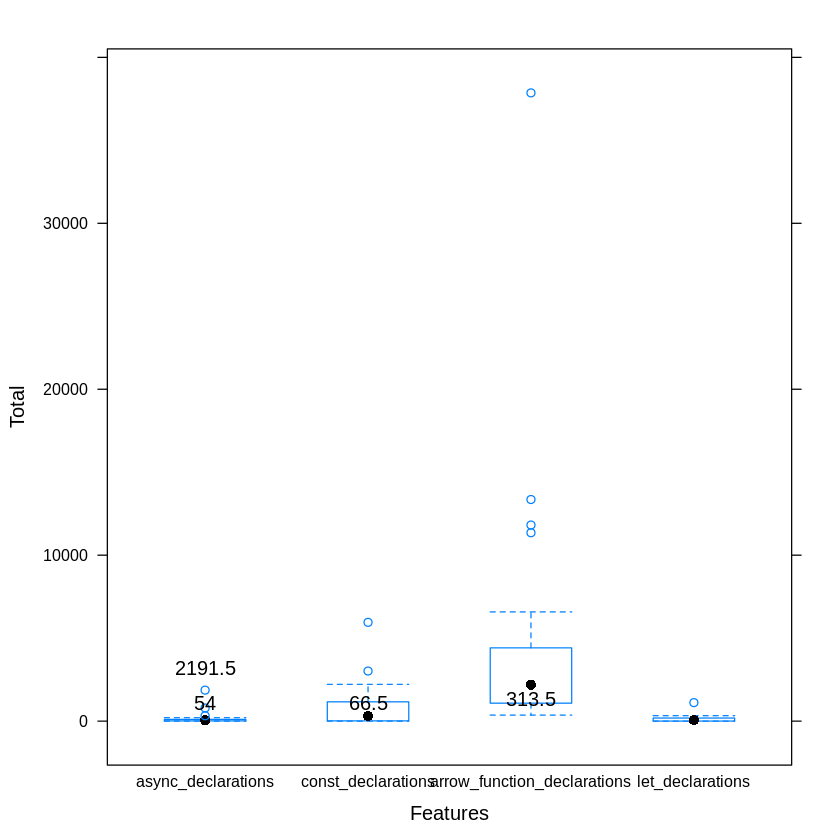

In [49]:
### Research Question 1

rq1 <- sqldf("select ds.project, date,async_declarations,await_declarations,const_declarations,class_declarations,
              arrow_function_declarations,let_declarations,export_declarations,yield_declarations,import_statements,
              promise_declarations,promise_all_and_then,default_parameters,rest_statements,spread_arguments,array_destructuring,
              object_destructuring,statements,files
              from ds, projects p
              where ds.project = p.project
              and ds.date = p.last_revision", method = "name__class")

rq1 <- melt(rq1, id.vars=c("project", "date", "statements", "files"), value.name = "total", variable.name="feature")

# colnames(rq1)

rq5 <- sqldf("select project, feature, total
                      from rq1 
                      where feature in ('async_declarations','arrow_function_declarations', 'const_declarations',
'let_declarations')
                      order by 2")

# pdf("distribution.pdf",         # File name
#     width = 8, height = 7, # Width and height in inches
#     bg = "white")

# bwplot(total~feature,data=rq5,xlab="Features",ylab="Total")

# dev.off()

bwplot(total~feature,data=rq5,xlab="Features",ylab="Total", md = tapply(rq5$total, rq5$feature, median),
       panel = function(x, y, md, ...) {
         panel.bwplot(x, y, ...)
         panel.text(x = 1:4, y = md, labels = round(md, 2), pos = 3)
       })

rq5%>%
group_by(feature)%>% 
summarise(Mean=mean(total), Max=max(total), Min=min(total), Median=median(total), Std=sd(total))

sqldf("select feature, sum(total)
       from rq1 
       group by feature 
       order by 1")

rq1_summary <- sqldf("select feature, (100*count(distinct project))/28.0 percentage
                      from rq1 
                      where total > 0 
                      group by feature", method = "name__class")

rq1_summary

[1] 28

[1] "project"     "total_arrow" "total_async" "total_const" "total_let"

[1] "Arrow Function Declarations" "Async Declarations"         
[3] "Const Declarations"          "Let Declarations"

,Arrow Function Declarations,Async Declarations,Const Declarations,Let Declarations
Arrow Function Declarations,1.00000000,0.2701530,-0.0570298,-0.08246136
Async Declarations,0.27015295,1.0000000,0.8006151,0.83531727
Const Declarations,-0.05702980,0.8006151,1.0000000,0.90291668
Let Declarations,-0.08246136,0.8353173,0.9029167,1.00000000


feature,statments,files
<fct>,<dbl>,<dbl>
async_declarations,0.06433069,0.4735113
const_declarations,-0.25688079,0.3473022
arrow_function_declarations,0.86261631,0.4280827
let_declarations,-0.20462297,0.3141282


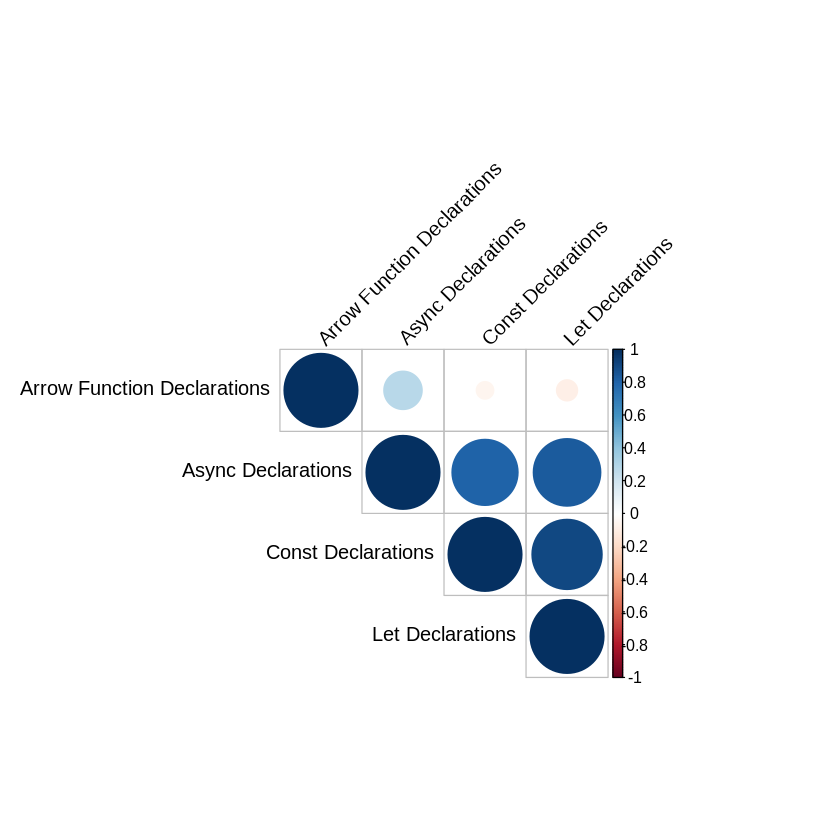

In [50]:
rq6 <- sqldf("select project, feature, statements, files, total
                      from rq1 
                      where feature in ('async_declarations','arrow_function_declarations', 'const_declarations',
'let_declarations')
                      order by 2")

# rq6

arrow_function_declarations <- sqldf("select project, total as total_arrow from rq6 where feature = 
'arrow_function_declarations'")
async_declarations <- sqldf("select project, total as total_async from rq6 where feature = 'async_declarations'")
const_declarations <- sqldf("select project, total as total_const from rq6 where feature = 'const_declarations'")
let_declarations <- sqldf("select project, total as total_let from rq6 where feature = 'let_declarations'")

rq8 <- merge(arrow_function_declarations,async_declarations)
rq8 <- merge(rq8,const_declarations)
rq8 <- merge(rq8,let_declarations)

nrow(rq8)
colnames(rq8)

rq8 <- sqldf("select total_arrow as [Arrow Function Declarations], total_async as [Async Declarations], 
total_const as [Const Declarations], total_let as [Let Declarations] from rq8")

res <- cor(rq8)
colnames(res)
res

corrplot(res, type = "upper", order = "hclust", 
          tl.col = "black", tl.srt = 45)


rq6%>%
group_by(feature)%>% 
summarise(statments=cor(statements,total,method="spearman"), files=cor(files,total,method="spearman"))


In [51]:
cd <- as.Date("2012-01-01")
maxDate <- as.Date("2023-06-30")

accm = ds[FALSE,]
nrow(accm)
while(cd < maxDate) {
  lastCommit <- fn$sqldf("select project, max(date) as date
                       from ds 
                       where date < '$cd'
                       group by project");
  
  
  
  monthYear = format(cd, "%Y-%m");
  
  snapshot <- fn$sqldf("select ds.*, '$monthYear' as monthYear
                        from ds, lastCommit lc
                        where ds.project = lc.project 
                          and ds.date = lc.date");
  
  
  accm <- rbind(accm, snapshot);
  
  # cd <- cd + 7;
  cd <- ymd(cd %m+% months(1))
}

rq2 <- sqldf("select project, monthYear, async_declarations,await_declarations,const_declarations,
class_declarations,arrow_function_declarations,let_declarations,export_declarations,yield_declarations,
import_statements,promise_declarations,promise_all_and_then,default_parameters,rest_statements,
spread_arguments,array_destructuring,object_destructuring
              from accm")

sqldf("select count(distinct project) from accm")

rq2 <- melt(rq2, id.vars=c("project", "monthYear"), value.name = "total", variable.name="feature")


sqldf("select feature, min(monthYear)
       from rq2
       where total > 0
       group by feature")

[1] 0

count(distinct project)
<int>
28


feature,min(monthYear)
<fct>,<chr>
array_destructuring,2015-10
arrow_function_declarations,2012-02
async_declarations,2012-02
await_declarations,2015-03
class_declarations,2015-09
const_declarations,2013-01
default_parameters,2015-09
export_declarations,2015-03
import_statements,2015-03


In [56]:
ts <- sqldf("select feature, monthYear, sum(total) total
       from rq2 
       group by feature, monthYear 
       order by 1,2")

ts$monthYear = as.Date(paste(ts$monthYear,"-01",sep=""))

# Customizing the output
pdf("arrow_function_declarations.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'arrow_function_declarations',], type = "l")
dev.off()

# Customizing the output
pdf("async_declarations.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'async_declarations',], type = "l")
dev.off()

# # Customizing the output
pdf("let_declarations.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'let_declarations',], type = "l")
dev.off()


png 
  2

png 
  2

png 
  2

In [57]:
pdf("const_declarations.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'const_declarations',], type = "l")
dev.off()

pdf("object_destructuring.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'object_destructuring',], type = "l")
dev.off()

pdf("array_destructuring.pdf",         # File name
    width = 8, height = 7, # Width and height in inches
    bg = "white")
xyplot(total ~ monthYear | feature, data=ts[ts$feature == 'array_destructuring',], type = "l")
dev.off()

png 
  2

png 
  2

png 
  2